In [ ]:
import pandas as pd
import numpy as np

In [ ]:
print(pd.__version__)
print(np.__version__)

2.2.2
2.0.2


#Loading the Dataset

In [ ]:
df = pd.read_csv('used_cars.csv')

In [ ]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [ ]:
df.shape

(4009, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [ ]:
df['brand'].unique()

array(['Ford', 'Hyundai', 'Lexus', 'INFINITI', 'Audi', 'Acura', 'BMW',
       'Tesla', 'Land', 'Aston', 'Toyota', 'Lincoln', 'Jaguar',
       'Mercedes-Benz', 'Dodge', 'Nissan', 'Genesis', 'Chevrolet', 'Kia',
       'Jeep', 'Bentley', 'Honda', 'Lucid', 'MINI', 'Porsche', 'Hummer',
       'Chrysler', 'Volvo', 'Cadillac', 'Lamborghini', 'Maserati',
       'Volkswagen', 'Subaru', 'Rivian', 'GMC', 'RAM', 'Alfa', 'Ferrari',
       'Scion', 'Mitsubishi', 'Mazda', 'Saturn', 'Bugatti', 'Polestar',
       'Rolls-Royce', 'McLaren', 'Buick', 'Lotus', 'Pontiac', 'FIAT',
       'Karma', 'Saab', 'Mercury', 'Plymouth', 'smart', 'Maybach',
       'Suzuki'], dtype=object)

In [ ]:
df['model'].unique()

array(['Utility Police Interceptor Base', 'Palisade SEL', 'RX 350 RX 350',
       ..., 'Martin DB7 Vantage Volante', 'Impala 2LZ', 'Taycan'],
      dtype=object)

In [ ]:
df['fuel_type'].unique()

array(['E85 Flex Fuel', 'Gasoline', 'Hybrid', nan, 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [ ]:
df['milage'].unique()

array(['51,000 mi.', '34,742 mi.', '22,372 mi.', ..., '53,705 mi.',
       '714 mi.', '2,116 mi.'], dtype=object)

In [ ]:
df['engine'].unique()

array(['300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capability',
       '3.8L V6 24V GDI DOHC', '3.5 Liter DOHC', ...,
       '136.0HP 1.8L 4 Cylinder Engine Gasoline Fuel',
       '270.0HP 2.0L 4 Cylinder Engine Gasoline Fuel',
       '420.0HP 5.9L 12 Cylinder Engine Gasoline Fuel'], dtype=object)

In [ ]:
df.drop(columns=['ext_col','int_col','clean_title'], inplace=True)

In [ ]:
df.isnull().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,170
engine,0
transmission,0
accident,113
price,0


In [ ]:
df.describe()

,model_year
count,4009.000000
mean,2015.515590
std,6.104816
min,1974.000000
25%,2012.000000
50%,2017.000000
75%,2020.000000
max,2024.000000


#Data Cleaning

In [ ]:
df['fuel_type']

,fuel_type
0,E85 Flex Fuel
1,Gasoline
2,Gasoline
3,Hybrid
4,Gasoline
...,...
4004,Gasoline
4005,Gasoline
4006,NaN
4007,Gasoline


In [ ]:
df['fuel_type'] = df['fuel_type'].replace(['–', 'not supported'], 'Unknown')
df['fuel_type'] = df['fuel_type'].fillna('Unknown')
print(df['fuel_type'].value_counts())

fuel_type
Gasoline          3309
Unknown            217
Hybrid             194
E85 Flex Fuel      139
Diesel             116
Plug-In Hybrid      34
Name: count, dtype: int64


In [ ]:
df = df[df['fuel_type'] != 'Unknown']
print(f"New shape of the DataFrame after dropping rows with 'Unknown' fuel_type: {df.shape}")

New shape of the DataFrame after dropping rows with 'Unknown' fuel_type: (3792, 9)


In [ ]:
df['fuel_type'].unique()

array(['E85 Flex Fuel', 'Gasoline', 'Hybrid', 'Diesel', 'Plug-In Hybrid'],
      dtype=object)

In [ ]:
df

,brand,model,model_year,milage,fuel_type,engine,transmission,accident,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,At least 1 accident or damage reported,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,At least 1 accident or damage reported,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,None reported,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,None reported,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,None reported,"$34,999"
...,...,...,...,...,...,...,...,...,...
4003,Mercedes-Benz,E-Class E 300 4MATIC,2018,"53,705 mi.",Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,At least 1 accident or damage reported,"$25,900"
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,None reported,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,None reported,"$53,900"
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,None reported,"$62,999"


In [ ]:
df['accident']

,accident
0,At least 1 accident or damage reported
1,At least 1 accident or damage reported
2,None reported
3,None reported
4,None reported
...,...
4003,At least 1 accident or damage reported
4004,None reported
4005,None reported
4007,None reported


###None Reported -> 0
###Atleast 1 accident -> 1

In [ ]:
print("Original 'accident' column value counts:")
print(df['accident'].value_counts(dropna=False))

accident_mapping = {
    'None reported': 0,
    'At least 1 accident or damage reported': 1
}

df['accident'] = df['accident'].map(accident_mapping).fillna(0).astype(int)

print("\n'accident' column value counts after conversion:")
print(df['accident'].value_counts(dropna=False))
print("\nDataFrame info after conversion:")
df.info()

Original 'accident' column value counts:
accident
None reported                             2717
At least 1 accident or damage reported     967
NaN                                        108
Name: count, dtype: int64

'accident' column value counts after conversion:
accident
0    2825
1     967
Name: count, dtype: int64

DataFrame info after conversion:
<class 'pandas.core.frame.DataFrame'>
Index: 3792 entries, 0 to 4008
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         3792 non-null   object
 1   model         3792 non-null   object
 2   model_year    3792 non-null   int64 
 3   milage        3792 non-null   object
 4   fuel_type     3792 non-null   object
 5   engine        3792 non-null   object
 6   transmission  3792 non-null   object
 7   accident      3792 non-null   int64 
 8   price         3792 non-null   object
dtypes: int64(2), object(7)
memory usage: 296.2+ KB


In [ ]:
df['price']

,price
0,"$10,300"
1,"$38,005"
2,"$54,598"
3,"$15,500"
4,"$34,999"
...,...
4003,"$25,900"
4004,"$349,950"
4005,"$53,900"
4007,"$62,999"


In [ ]:
df.isnull().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
engine,0
transmission,0
accident,0
price,0


##Changing Price format

In [ ]:
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3792 entries, 0 to 4008
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         3792 non-null   object
 1   model         3792 non-null   object
 2   model_year    3792 non-null   int64 
 3   milage        3792 non-null   object
 4   fuel_type     3792 non-null   object
 5   engine        3792 non-null   object
 6   transmission  3792 non-null   object
 7   accident      3792 non-null   int64 
 8   price         3792 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 296.2+ KB


In [ ]:
df['accident']

,accident
0,1
1,1
2,0
3,0
4,0
...,...
4003,1
4004,0
4005,0
4007,0


##Changing milage format

In [ ]:
df['milage']

,milage
0,"51,000 mi."
1,"34,742 mi."
2,"22,372 mi."
3,"88,900 mi."
4,"9,835 mi."
...,...
4003,"53,705 mi."
4004,714 mi.
4005,"10,900 mi."
4007,"33,000 mi."


In [ ]:
df['milage'] = df['milage'].str.split(' ').str[0].str.replace(',', '').astype(int)

In [ ]:
df['milage']

,milage
0,51000
1,34742
2,22372
3,88900
4,9835
...,...
4003,53705
4004,714
4005,10900
4007,33000


In [ ]:
print('Fuel Type')
print(df['fuel_type'].value_counts())

print('\nTransmission: ')
print(df['transmission'].value_counts())

print('\nAccident: ')
print(df['accident'].value_counts())

Fuel Type
fuel_type
Gasoline          3309
Hybrid             194
E85 Flex Fuel      139
Diesel             116
Plug-In Hybrid      34
Name: count, dtype: int64

Transmission: 
transmission
A/T                                                                 934
8-Speed A/T                                                         405
Transmission w/Dual Shift Mode                                      396
6-Speed A/T                                                         362
6-Speed M/T                                                         243
Automatic                                                           226
7-Speed A/T                                                         209
8-Speed Automatic                                                   176
10-Speed A/T                                                        119
5-Speed A/T                                                          85
6-Speed Automatic                                                    73
9-Speed A/T       

#Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Distribution')

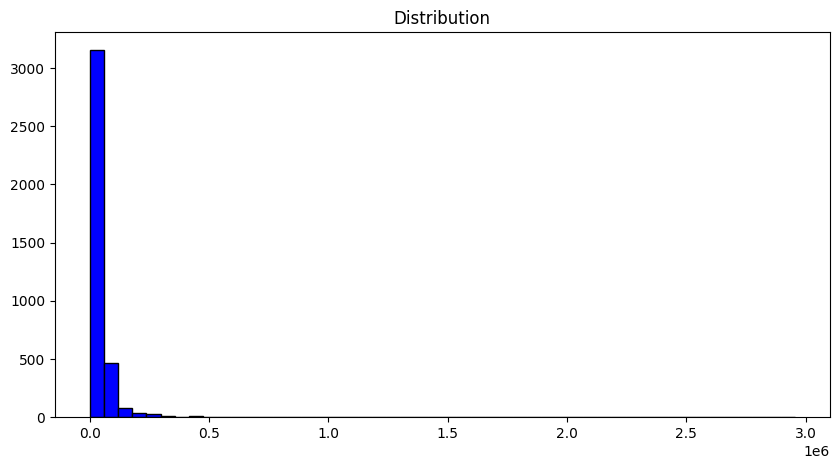

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(df['price'], bins=50, color='blue',edgecolor='black')
plt.title('Distribution')

Text(0.5, 0, 'Fuel')

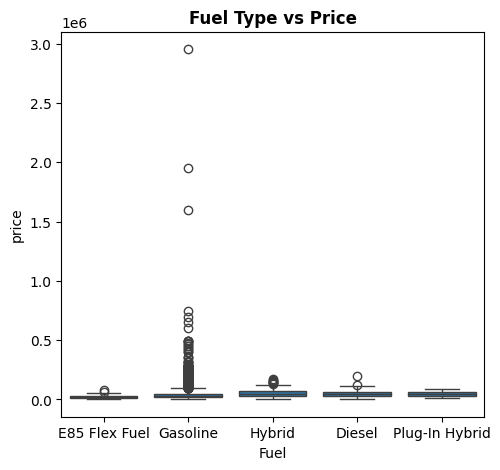

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x='fuel_type',y='price',data=df)
plt.title('Fuel Type vs Price', fontweight='bold')
plt.xlabel('Fuel')

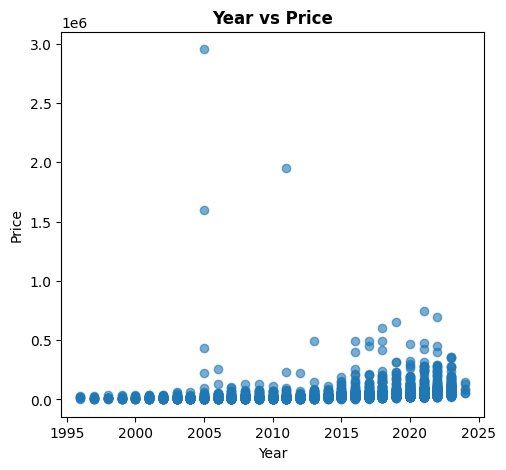

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(df['model_year'],df['price'],alpha=0.6)
plt.title('Year vs Price', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

Text(0, 0.5, 'Price')

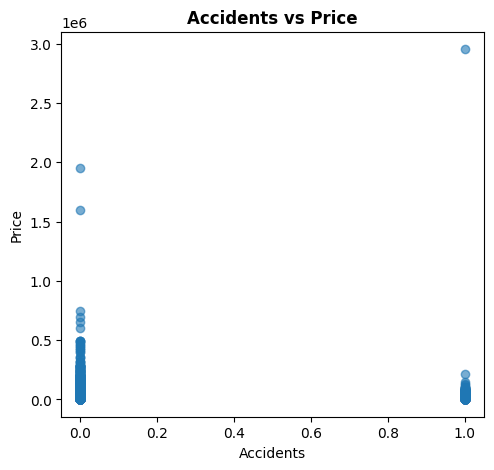

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.scatter(df['accident'],df['price'],alpha=0.6)
plt.title('Accidents vs Price', fontweight='bold')
plt.xlabel('Accidents')
plt.ylabel('Price')

In [ ]:
df[df['accident']==1]

,brand,model,model_year,milage,fuel_type,engine,transmission,accident,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,1,10300
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,1,38005
31,Dodge,Ram 1500 Laramie Mega Cab,2006,300183,Gasoline,345.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,A/T,1,10900
39,BMW,Z4 sDrive28i,2014,70000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,1,20000
42,Dodge,Sprinter 2500,2007,189719,Diesel,3.0L V6 Cylinder Engine Diesel Fuel,5-Speed A/T,1,14000
...,...,...,...,...,...,...,...,...,...
3987,BMW,X3 xDrive28i,2015,92984,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,1,17000
4000,Subaru,Ascent Touring 7-Passenger,2021,32250,Gasoline,260.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,A/T,1,36000
4001,Volkswagen,Routan SE,2011,194000,Gasoline,283.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,1,3500
4003,Mercedes-Benz,E-Class E 300 4MATIC,2018,53705,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,1,25900


#Outliers

In [ ]:
df.describe()

,model_year,milage,accident,price
count,3792.000000,3792.000000,3792.000000,3.792000e+03
mean,2015.456487,66114.991297,0.255011,4.423179e+04
std,5.852509,52349.624900,0.435925,8.012376e+04
min,1996.000000,100.000000,0.000000,2.000000e+03
25%,2012.000000,24263.250000,0.000000,1.700000e+04
50%,2017.000000,54390.000000,0.000000,3.000000e+04
75%,2020.000000,95500.000000,1.000000,4.900000e+04
max,2024.000000,405000.000000,1.000000,2.954083e+06


### Visualizing Price Distribution and Outliers

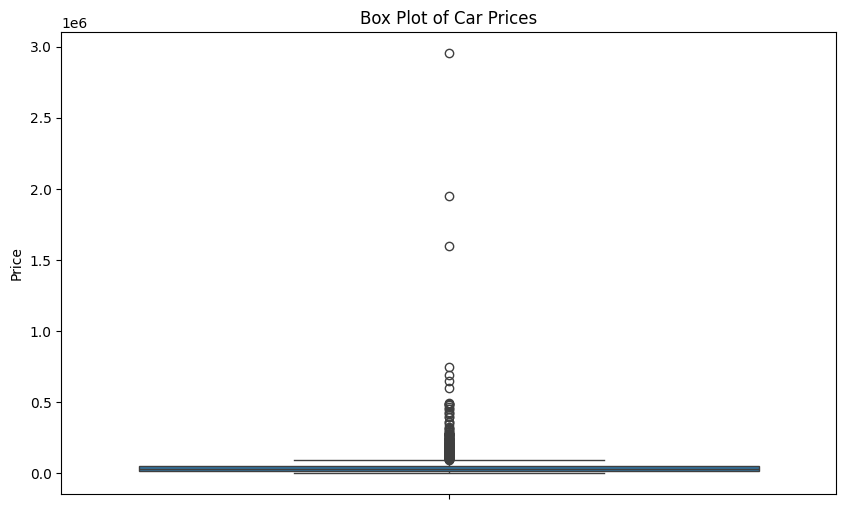

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['price'])
plt.title('Box Plot of Car Prices')
plt.ylabel('Price')
plt.show()

### Identifying Outliers using the Interquartile Range (IQR) Method

In [ ]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")
print(f"Number of outliers detected: {len(outliers)}")

print("\nTop 5 price outliers:")
display(outliers.sort_values(by='price', ascending=False).head())

Lower Bound for Outliers: -31000.0
Upper Bound for Outliers: 97000.0
Number of outliers detected: 245

Top 5 price outliers:


,brand,model,model_year,milage,fuel_type,engine,transmission,accident,price
693,Maserati,Quattroporte Base,2005,32000,Gasoline,394.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,1,2954083
229,Bugatti,Veyron 16.4 Grand Sport,2011,6330,Gasoline,8.0L W16 64V GDI DOHC Twin Turbo,7-Speed Automatic with Auto-Shift,0,1950995
3046,Porsche,Carrera GT Base,2005,4400,Gasoline,605.0HP 5.7L 10 Cylinder Engine Gasoline Fuel,6-Speed M/T,0,1599000
1356,Lamborghini,Aventador SVJ Base,2021,6987,Gasoline,6.5L V12 48V MPFI DOHC,7-Speed,0,749950
624,Rolls-Royce,Cullinan,2022,398,Gasoline,6.7L V12 48V GDI DOHC Twin Turbo,8-Speed Automatic,0,695000


In [ ]:
df_cleaned = df.drop(outliers.index)

print(f"Original DataFrame shape: {df.shape}")
print(f"Outliers DataFrame shape: {outliers.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

display(df_cleaned.head())

Original DataFrame shape: (3792, 9)
Outliers DataFrame shape: (245, 9)
Cleaned DataFrame shape: (3547, 9)


,brand,model,model_year,milage,fuel_type,engine,transmission,accident,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,1,10300
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,1,38005
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,0,54598
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,0,15500
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,0,34999


In [ ]:
df.describe()

,model_year,milage,accident,price
count,3792.000000,3792.000000,3792.000000,3.792000e+03
mean,2015.456487,66114.991297,0.255011,4.423179e+04
std,5.852509,52349.624900,0.435925,8.012376e+04
min,1996.000000,100.000000,0.000000,2.000000e+03
25%,2012.000000,24263.250000,0.000000,1.700000e+04
50%,2017.000000,54390.000000,0.000000,3.000000e+04
75%,2020.000000,95500.000000,1.000000,4.900000e+04
max,2024.000000,405000.000000,1.000000,2.954083e+06


In [ ]:
df_cleaned.describe()

,model_year,milage,accident,price
count,3547.00000,3547.000000,3547.000000,3547.000000
mean,2015.17987,69753.079222,0.269805,32661.232027
std,5.86421,52051.274917,0.443921,20592.098719
min,1996.00000,100.000000,0.000000,2000.000000
25%,2012.00000,28622.000000,0.000000,16000.000000
50%,2016.00000,59678.000000,0.000000,28991.000000
75%,2020.00000,98625.000000,1.000000,44800.000000
max,2024.00000,405000.000000,1.000000,96998.000000


#Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [ ]:
import sklearn
print(sklearn.__version__)

1.6.1


In [ ]:
df_cleaned

,brand,model,model_year,milage,fuel_type,engine,transmission,accident,price
0,Ford,Utility Police Interceptor Base,2013,51000,3,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,1,10300
1,Hyundai,Palisade SEL,2021,34742,0,3.8L V6 24V GDI DOHC,8-Speed Automatic,1,38005
2,Lexus,RX 350 RX 350,2022,22372,0,3.5 Liter DOHC,Automatic,0,54598
3,INFINITI,Q50 Hybrid Sport,2015,88900,2,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,0,15500
4,Audi,Q3 45 S line Premium Plus,2021,9835,0,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,0,34999
...,...,...,...,...,...,...,...,...,...
4001,Volkswagen,Routan SE,2011,194000,0,283.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,1,3500
4003,Mercedes-Benz,E-Class E 300 4MATIC,2018,53705,0,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,1,25900
4005,Audi,S4 3.0T Premium Plus,2022,10900,0,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,0,53900
4007,Ford,F-150 Raptor,2020,33000,0,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,0,62999


In [ ]:
X=df_cleaned.drop(['price'],axis=1)
y=df_cleaned['price']

In [ ]:
X.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,accident
0,Ford,Utility Police Interceptor Base,2013,51000,3,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,1
1,Hyundai,Palisade SEL,2021,34742,0,3.8L V6 24V GDI DOHC,8-Speed Automatic,1
2,Lexus,RX 350 RX 350,2022,22372,0,3.5 Liter DOHC,Automatic,0
3,INFINITI,Q50 Hybrid Sport,2015,88900,2,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,0
4,Audi,Q3 45 S line Premium Plus,2021,9835,0,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,0


In [ ]:
y.head()

,price
0,10300
1,38005
2,54598
3,15500
4,34999


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [ ]:
ohe = OneHotEncoder()
ohe.fit(X[['brand','model','engine','transmission']])

OneHotEncoder()

In [ ]:
column_transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['brand', 'model', 'engine', 'transmission', 'fuel_type']),
    remainder='passthrough', force_int_remainder_cols=False
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training sample : {X_train.shape[0]} (80%)")
print(f"Testing sample : {X_test.shape[0]} (20%)")

Training sample : 2837 (80%)
Testing sample : 710 (20%)


#Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics

In [ ]:
lr = LinearRegression()

In [ ]:
pipe = make_pipeline(column_transformer,lr)

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['brand', 'model', 'engine',
                                                   'transmission',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
r2 = r2_score(y_test,y_pred)
r2

0.6459720021765645

In [ ]:
scores = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=i)
    lr = LinearRegression()
    pipe = make_pipeline(column_transformer,lr)
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [ ]:
best_state = np.argmax(scores)
best_state

np.int64(71)

In [ ]:
scores[np.argmax(scores)]

0.7414094270726383

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=best_state)
lr = LinearRegression()
pipe = make_pipeline(column_transformer,lr)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
r2_lr = r2_score(y_test,y_pred)
r2_lr

0.7414094270726383

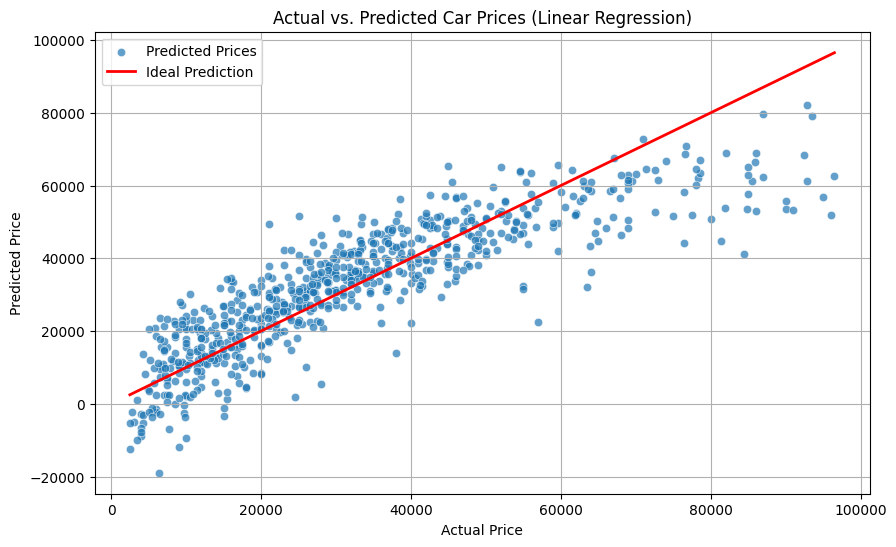

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, label='Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Ideal Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Car Prices (Linear Regression)')
plt.grid(True)
plt.legend()
plt.show()

#Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_reg = Lasso(alpha=0.1, max_iter=10000)
pipe_lasso = make_pipeline(column_transformer, lasso_reg)
pipe_lasso.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['brand', 'model', 'engine',
                                                   'transmission',
                                                   'fuel_type'])])),
                ('lasso', Lasso(alpha=0.1, max_iter=10000))])

In [ ]:
test_pred_lasso = pipe_lasso.predict(X_test)
test_r2_lasso = r2_score(y_test, test_pred_lasso)

test_mae_lasso=metrics.mean_absolute_error(y_test, test_pred_lasso)
test_rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test, test_pred_lasso))

print(f"Test R2 Score: {test_r2_lasso}")
print(f"Test MAE Score: {test_mae_lasso}")
print(f"Test RMSE Score: {test_rmse_lasso}")

Test R2 Score: 0.8146109531563421
Test MAE Score: 6232.357810455251
Test RMSE Score: 8823.89832066578


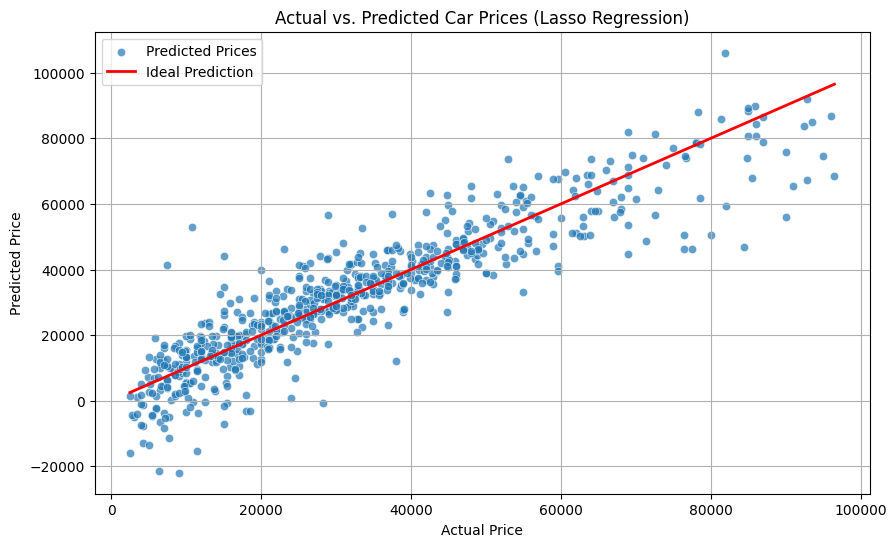

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=test_pred_lasso, alpha=0.7, label='Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Ideal Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Car Prices (Lasso Regression)')
plt.grid(True)
plt.legend()
plt.show()

#Model Comparison

In [ ]:
print('Linear Regression:',r2_lr)
print('Lasso Regression:',test_r2_lasso)

Linear Regression: 0.7414094270726383
Lasso Regression: 0.8146109531563421


##Hence, best model is Lasso

#Downloading and testing model

In [ ]:
import joblib

In [ ]:
joblib.dump(pipe_lasso, 'lasso_regression_model.pkl')

['lasso_regression_model.pkl']

In [ ]:
df_cleaned.to_csv('Cleaned_Car_Data.csv')

##Prediction

In [ ]:
input_data = pd.DataFrame({
    'brand': ['Ford'],
    'model': ['Utility Police Interceptor Base'],
    'model_year': [2013],
    'milage': [51000],
    'fuel_type': ['E85 Flex Fuel'],
    'engine': ['300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capability'],
    'transmission': ['6-Speed A/T'],
    'accident': [1]
})

In [ ]:
prediction = pipe_lasso.predict(input_data)[0]
print(prediction)

10583.699068181217
